# Data Visualization

## Line Plot

it is commonly used to display change over time as a series of data points connected by straight line. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pip install xlrd  

Note: you may need to restart the kernel to use updated packages.


In [4]:
df = pd.read_excel('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20), 
                       skipfooter=2)
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


To get a short summary of the dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

To get the index and columns as lists 

In [6]:
df.columns.tolist()
df.index.tolist()

print (type(df.columns.tolist()))
print (type(df.index.tolist()))

<class 'list'>
<class 'list'>


In [7]:
# to know the dimensions of the dataframe
df.shape  

(195, 43)

To remove unnecessary columns

In [8]:
df.drop(['Type','Coverage','AREA','REG','DEV'], axis =1, inplace=True)
df.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


To rename some of the columns name

In [9]:
df.rename(columns={'OdName': 'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

To add a new column that represent the sum of total immigrants in each country over the period 1980 - 2013

In [10]:
df['Total'] = df.sum(axis=1)
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


To check out null values

In [11]:
df.isnull().sum()

Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

This dataset does not contain any null values 

In [13]:
df.columns = list(map(str, df.columns))
years = list(map(str, range(1980,2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

To set country as index

In [14]:
df.set_index('Country', inplace = True) 
df.index.name = None
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [15]:
print(df.loc['Japan'])  # look for a row

Continent                 Asia
Region            Eastern Asia
DevName      Developed regions
1980                       701
1981                       756
1982                       598
1983                       309
1984                       246
1985                       198
1986                       248
1987                       422
1988                       324
1989                       494
1990                       379
1991                       506
1992                       605
1993                       907
1994                       956
1995                       826
1996                       994
1997                       924
1998                       897
1999                      1083
2000                      1010
2001                      1092
2002                       806
2003                       817
2004                       973
2005                      1067
2006                      1212
2007                      1250
2008                      1284
2009    

In [17]:
print(df['2013'])  # look for a column

Afghanistan       2004
Albania            603
Algeria           4331
American Samoa       0
Andorra              1
                  ... 
Viet Nam          2112
Western Sahara       0
Yemen              217
Zambia              59
Zimbabwe           407
Name: 2013, Length: 195, dtype: int64


In [18]:
# query data with more than one condition
df[ (df['Continent']=='Europe') & (df['Region']=='Southern Europe')]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
Bosnia and Herzegovina,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,0,...,211,217,209,182,156,168,140,121,119,21855
Croatia,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,0,...,128,102,102,131,92,91,135,112,125,8001
Greece,Europe,Southern Europe,Developed regions,1065,953,897,633,580,584,547,...,100,74,110,107,119,101,102,146,298,12410
Italy,Europe,Southern Europe,Developed regions,1820,2057,1480,820,858,667,731,...,344,325,320,370,429,434,374,440,545,22624
Malta,Europe,Southern Europe,Developed regions,191,242,153,64,60,68,76,...,28,24,7,21,18,17,8,9,4,1546
Montenegro,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,0,...,0,0,7,19,10,14,19,26,9,105
Portugal,Europe,Southern Europe,Developed regions,4473,3486,2432,1433,1398,1451,2617,...,338,424,405,665,623,629,528,560,630,74167
San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,5


In [26]:
Japan = df.loc['Japan', years]
Japan.head()

1980    701
1981    756
1982    598
1983    309
1984    246
Name: Japan, dtype: object

Line plot

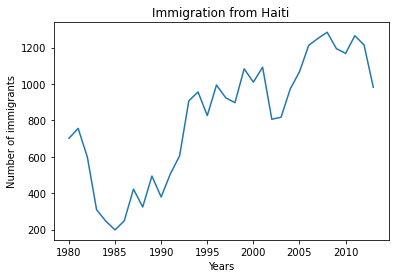

In [27]:
Japan.plot( kind =  'line' )

plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.show()

## Area Plot 

### Area plot is great to show how a total and their shares developed over time. When to use are plot?

1. To show how values develop over **time**
2. when **total** is as important as its shares, otherwise use a line plot 
3. **large differences** between my values, otherwise use a line plot 
4. When show **multiple** values over time


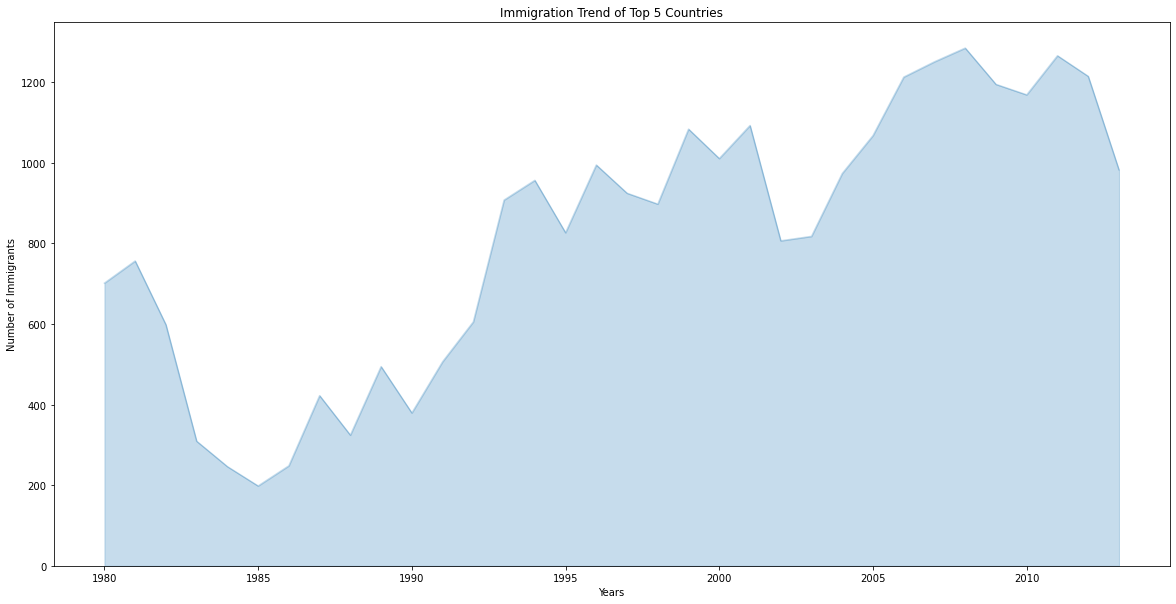

In [28]:
Japan.plot(kind='area', 
           alpha=0.25, # 0-1,  default transparency value a= 0.5
           stacked=False,
           figsize=(20, 10),
          )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

## Scatter Plot

scatter plot is a great indicator that allows us to see the relationship between two variables

In [59]:
# we can use the sum() method to get the total population per year
df_total = pd.DataFrame(df[years].sum(axis=0))

# view the final dataframe
df_total.head()

,0
1980,99137
1981,110563
1982,104271
1983,75550
1984,73417


In [60]:
# reset the index to put in back in as a column in the df_tot dataframe
df_total.reset_index(inplace = True)

# rename columns
df_total.columns = ['year', 'total']

df_total= df_total.astype(int)

df_total.head()


,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


In [61]:
df_total.dtypes

year     int32
total    int32
dtype: object

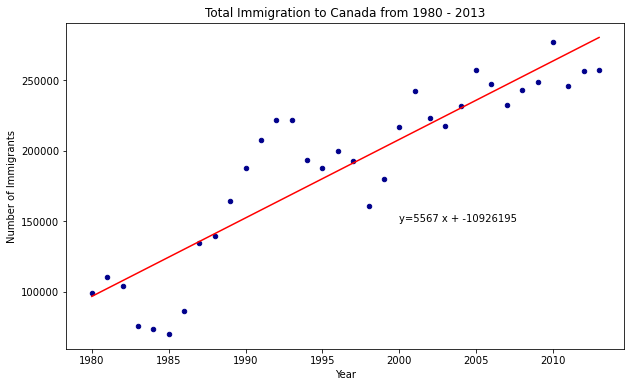

'Number of Immigrants = 5567 * Year + -10926195'

In [69]:
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
x = df_tot['year']  
y = df_tot['total']
fit = np.polyfit(x, y, deg=1)
plt.plot(x, fit[0] * x + fit[1], color='red') 
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'Number of Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 




##  Regression

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

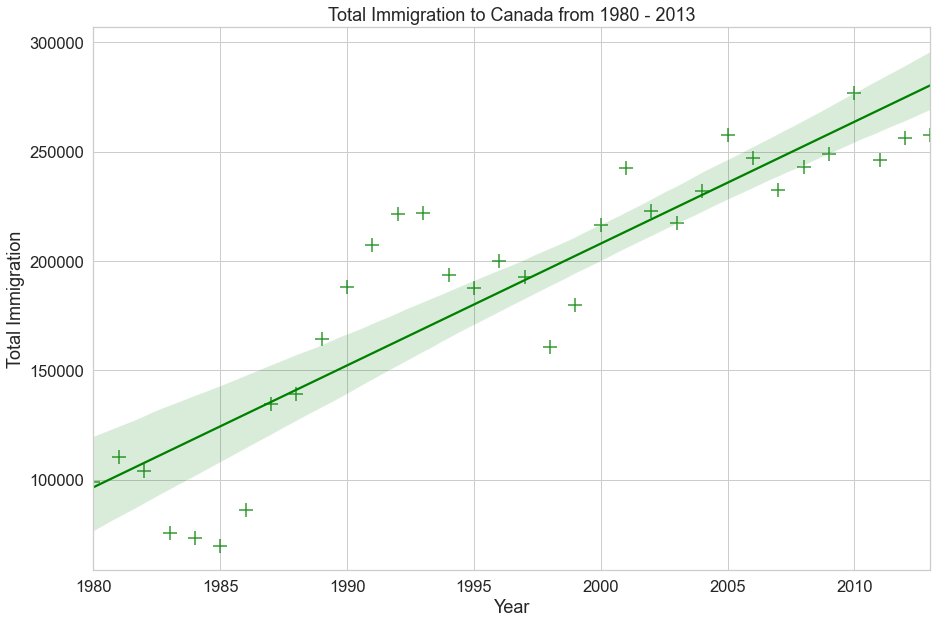

In [96]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')  # white background with gridlines.
 
ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

  ## Histogram

 Use histogram when you have continous measurements and want to understand the distribution of values and look for outliners

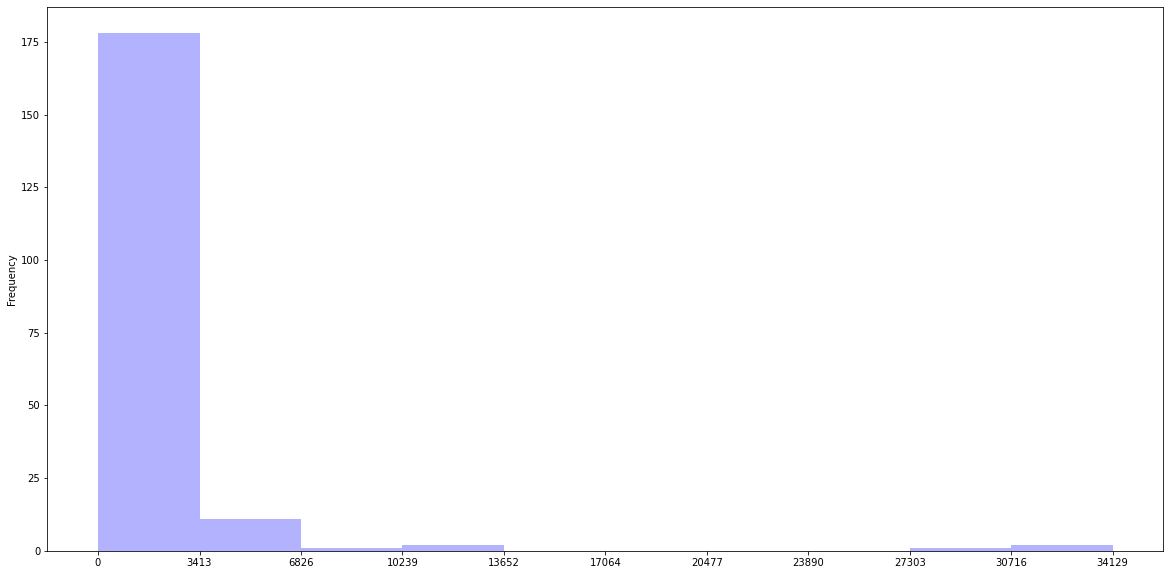

In [70]:
count, bin_edges = np.histogram (df['2013'])

df['2013'].plot(kind = 'hist',
                  figsize =(20,10),
                  bins= 10,
                  alpha = 0.3,
                  xticks = bin_edges,
                  color = [ 'blue'] )

## Bar Plot

 When we want to track the development of one or two variables over time in different categories.

For example, we would like to compare the revenues of two companies in the timeframe between 2014 and 2018

Text(3, 12, 'annote text example')

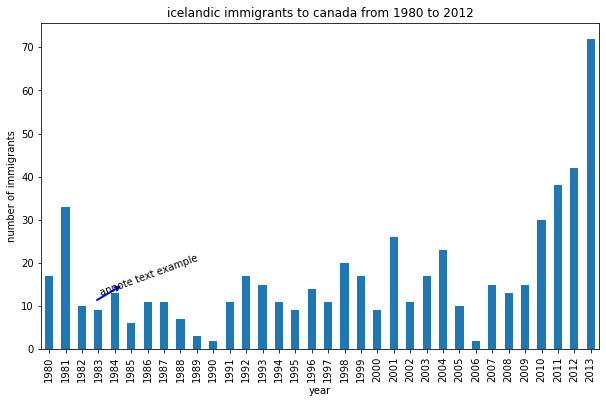

In [71]:
df_iceland = df.loc['Iceland',years]
df_iceland.index = df_iceland.index.map(int)
df_iceland.plot (kind= 'bar', figsize=(10,6))

plt.xlabel('year')
plt.ylabel('number of immigrants')
plt.title('icelandic immigrants to canada from 1980 to 2012')

# annotate  an arrow 
plt.annotate ( ' ',
                            xy= (4.5,15),   # place head of the arrow at point
                            xytext=(2.5,10),  # place base of the arrow at point
                             xycoords = 'data',# will use the coordinate system of the object being annotated
                             arrowprops=dict(arrowstyle = '->', connectionstyle='arc3', color ='blue', lw =2)
                            )

plt.annotate ( 'annote text example',   # text to display
                         xy=(3,12),                        # start the text at at point (year 2008 , pop 30)
                         rotation=20,               # based on trial and error to match the arrow
                         va='bottom',                  # want the text to be vertically 'bottom' aligned
                         ha='left',                        # want the text to be horizontally 'left' algned.
                     )
                  

Horizontal bar chart

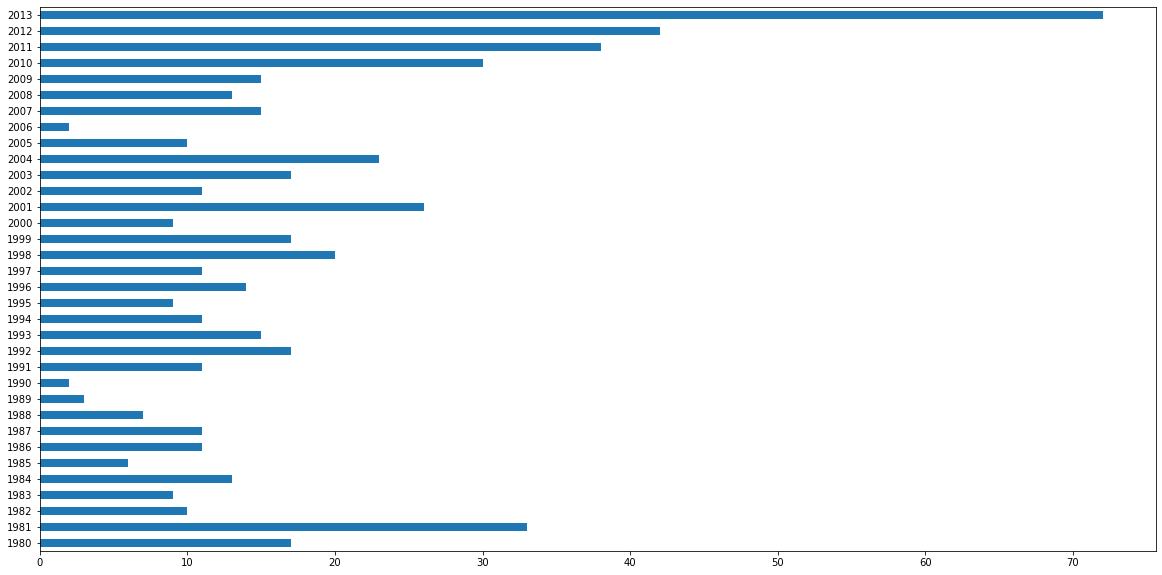

In [74]:
df_iceland.plot (kind= 'barh', figsize=(20,10))

## Pie Charts

### When to use pie chart

To depict (describe) sections of a whole. For example, if a company operates three divisions, at year-end its top management would be interested in seeing what portion of total revenues each division accounted for. 

In [75]:
df_continents = df.groupby('Continent',axis = 0).sum()
df_continents.head(10)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


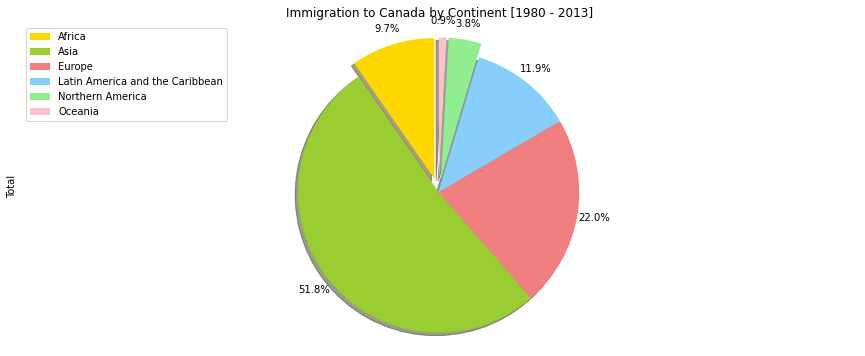

In [76]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )


plt.title('Immigration to Canada by Continent [1980 - 2013]') 

plt.axis('equal') 

plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

## Box Plots

It is ideal for comparing distributions ans summarizing a set of data

In [77]:
from IPython.display import Image


In [78]:
Image(url ="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/boxplot_complete.png",width=400 )

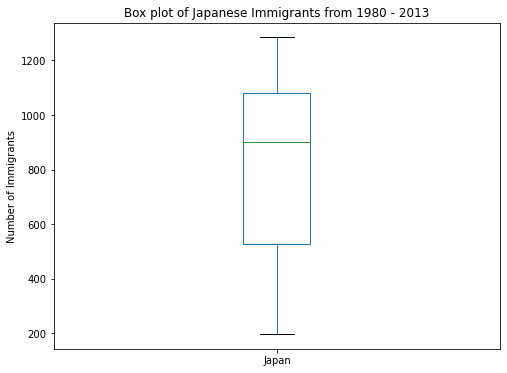

In [79]:
Japan.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

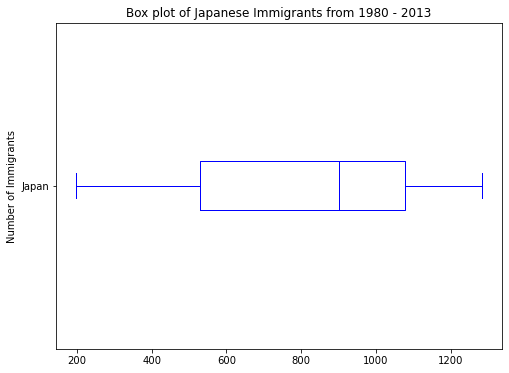

In [80]:
Japan.plot(kind='box', figsize=(8, 6),color='blue', vert=False)

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

### subplot

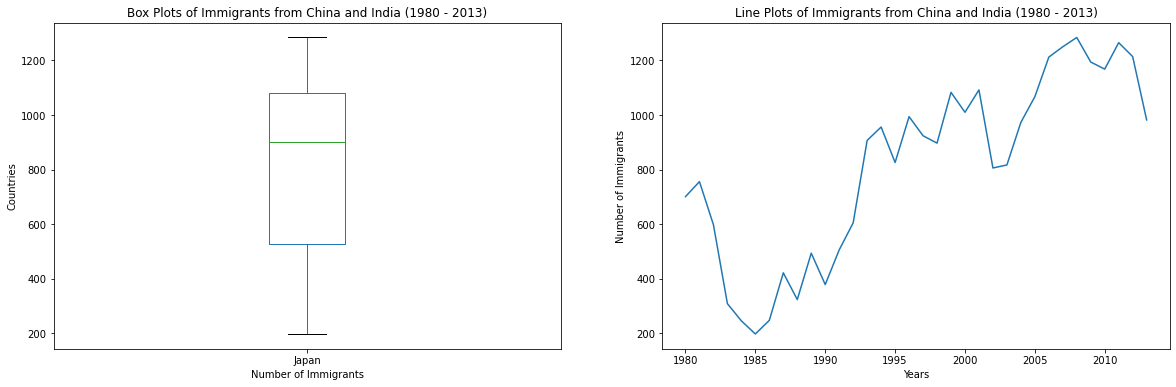

In [83]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2) 

# Subplot 1: Box plot
Japan.plot(kind='box', figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
Japan.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

## Bubble Plot

A bubble plot is simailar to scatter plot but it decribe relationship between 3 variables. 

In [84]:
df_can_t = df[years].transpose() # transposed dataframe

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()

,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


In [85]:
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

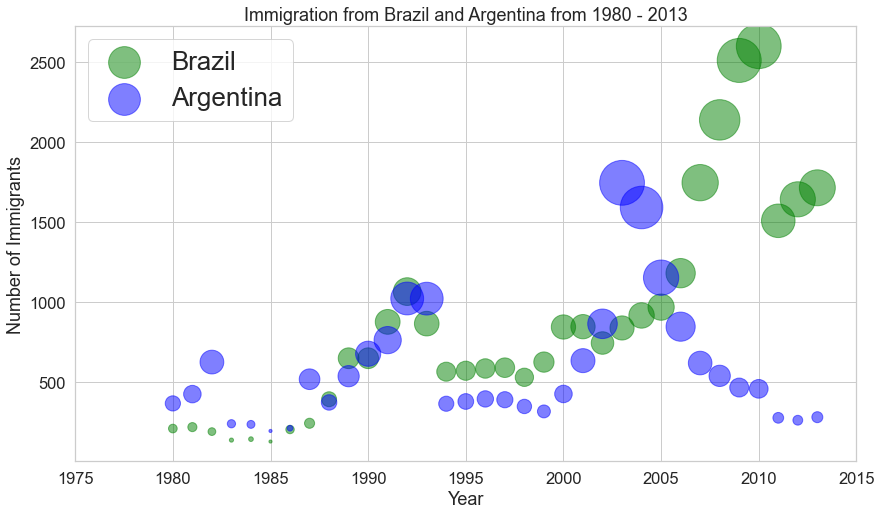

In [110]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

## Choropleth Maps

In [102]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: ...working... done

# All requested packages already installed.



In [115]:
df.rename(columns={'index': 'Country'},inplace=True)
df.head()

,Year,level_0,Country,Continent,Region,DevName,1980,1981,1982,1983,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,0,0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,1,1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,2,2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,3,3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,...,0,1,0,0,0,0,0,0,0,6
4,4,4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [117]:
geojson = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json'

world_map = folium.Map(location=[0, 0], zoom_start=2)
world_map.choropleth(
                geo_data = geojson,
                data = df,
                columns = ['Country','Total'],
                key_on = 'feature.properties.name',
                fill_color = 'YlOrRd',
                fill_opacity='0.7',
                line_opacity='0.2',
                legend_name='Immigration to Canada')

world_map


# Word Clouds

In [ ]:
# install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes